В этом домашнем задании будем парсить группу вк с помощью нашего бота

Создаем бота
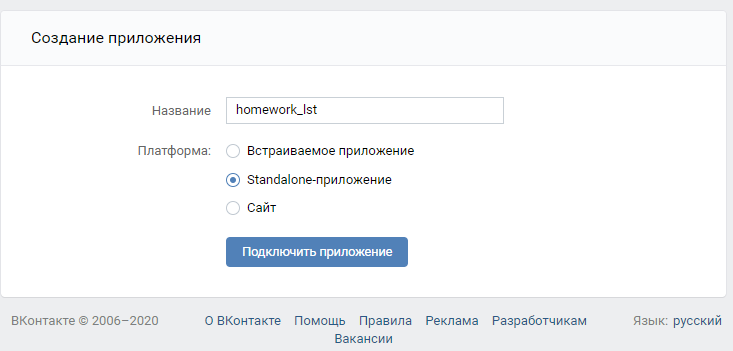

Загрузим библиотеки

In [68]:
import pandas as pd
import numpy as np

import datetime as dt

import requests
import re

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [3]:
import time

with open('token.txt') as f:
    token = f.read().strip()
version = '5.103'

этот айди принадлежит группе лентач

In [3]:
group_id = '29534144'

In [4]:
def vk_download(method,parameters):
    time.sleep(1)
    url='https://api.vk.com/method/'+ method + '?'  + parameters +'&v=' + version + '&access_token=' + token
    response = requests.get(url)
    info = response.json()
    return info

Напишем функции для парсинга в различных случаях

In [5]:
def string_info_parse(array, string):
    for item in group['items']:
        try:
            array.append(str(item[string]))
        except:
            array.append(np.nan)
            
def int_info_parse(array, string):
    for item in group['items']:
        try:
            array.append(int(item[string]))
        except:
            array.append(np.nan)

In [6]:
def string_subinfo_parse(array, string, substring):
    for item in group['items']:
        try:
            array.append(str(item[string][substring]))
        except:
            array.append(np.nan)
                        
            
def int_subinfo_parse(array, string, substring):
    for item in group['items']:
        try:
            array.append(int(item[string][substring]))
        except:
            array.append(np.nan)
            
def string_subinfo2_parse(array, string, substring):
    for item in group['items']:
        try:
            array.append(str(item[string][0][substring]))
        except:
            array.append(np.nan)  

Создадим массивы для хранения значений

In [7]:
usr_id = []
first_name = []
last_name = []
bd = []
sex = []
is_closed = []
deactivated = []
followers_count = []
city = []
country = []
has_photo = []
has_mobile = []
universities = []
status = []
quotes = []
instagram = []
skype = []
twitter = []
political = []
smoking = []
alcohol = []
relation = []



Будем парсить 71тыс пользователей

In [8]:
for i in range(0, 71):
    offset = str(i*1000)
    group = vk_download('groups.getMembers', f'group_id={group_id}&fields=id,bdate,is_closed,followers_count,verified,sex,city,country,home_town,counters,connections,has_photo,has_mobile,universities,status,quotes,personal&offset={offset}')
    group = group["response"]
    
    int_info_parse(usr_id, 'id')
    string_info_parse(first_name, 'first_name')
    string_info_parse(last_name, 'last_name')
    string_info_parse(bd, 'bdate')
    int_info_parse(sex, 'sex')
    int_info_parse(is_closed, 'is_closed')
    string_info_parse(deactivated, 'deactivated')
    int_info_parse(followers_count, 'followers_count')
    string_subinfo_parse(city, 'city', 'title')
    string_subinfo_parse(country, 'country', 'title')
    int_info_parse(has_photo, 'has_photo')
    int_info_parse(has_mobile, 'has_mobile')
    string_subinfo2_parse(universities, 'universities', 'name')
    string_info_parse(status, 'status')
    string_info_parse(quotes, 'quotes')
    string_info_parse(instagram, 'instagram')
    string_info_parse(skype, 'skype')
    string_info_parse(twitter, 'twitter')
    string_subinfo_parse(political, 'personal', 'political')
    int_subinfo_parse(smoking, 'personal', 'smoking')
    int_subinfo_parse(alcohol, 'personal', 'alcohol')
    int_info_parse(relation, 'relation')


In [9]:
def int_subinfo_user(array, string, substring):
    for item in users:
        try:
            array.append(int(item[string][substring]))
        except:
            array.append(0)

Цитаты заменим на длину цитат, то же самое со статусом

Заменим название профиля инстаграма на наличие, то есть 0 и 1

In [11]:
for i in range(len(bd)):
    pattern = re.compile(r'\.\d{4}')
    if pattern.findall(str(bd[i])):
        continue
    else:
        bd[i] = np.nan

for i in range(len(status)):
    if status[i] is not np.nan:
        status[i] = len(status[i])
    else:
        status[i] = 0
    
    if quotes[i] is not np.nan:
        quotes[i] = len(quotes[i])
    else:
        quotes[i] = 0
      
    if instagram[i] is not np.nan:
        instagram[i] = 1
    else:
        instagram[i] = 0
        
    if skype[i] is not np.nan:
        skype[i] = 1
    else:
        skype[i] = 0   
    
    if twitter[i] is not np.nan:
        twitter[i] = 1
    else:
        twitter[i] = 0  

### Домашнее задание будет посвящено задаче регрессии, а именно предсказание пола

Мы будем предсказывать пол человека по признакам которые спарсили. В нашем датасете в столбце `sex` женщины - 1, мужчины - 2

In [138]:
df = pd.DataFrame(columns=['id','first_name','last_name','bdate','sex',
                           'is_closed','deactivated','followers_count',
                           'city','country','has_photo','has_mobile',
                           'universities','status','quotes','instagram',
                           'skype','twitter','political','smoking','alcohol',
                           'albums','videos','audios','posts','gifts','pages'], index = range(71000)) 

df['id'] = pd.Series(usr_id)
df['first_name'] = pd.Series(first_name)
df['last_name'] = pd.Series(last_name)
df['bdate'] = pd.Series(bd)
df['sex'] = pd.Series(sex)
df['is_closed'] = pd.Series(is_closed)
df['deactivated'] = pd.Series(deactivated)
df['followers_count'] = pd.Series(followers_count)
df['city'] = pd.Series(city)
df['country'] = pd.Series(country)
df['has_photo'] = pd.Series(has_photo)
df['has_mobile'] = pd.Series(has_mobile)
df['universities'] = pd.Series(universities)
df['status'] = pd.Series(status)
df['quotes'] = pd.Series(quotes)
df['instagram'] = pd.Series(instagram)
df['skype'] = pd.Series(skype)
df['twitter'] = pd.Series(twitter)
df['political'] = pd.Series(political)
df['smoking'] = pd.Series(smoking)
df['alcohol'] = pd.Series(alcohol)

df

,id,first_name,last_name,bdate,sex,is_closed,deactivated,followers_count,city,country,...,twitter,political,smoking,alcohol,albums,videos,audios,posts,gifts,pages
0,177,Ekaterina,Abramenko,NaN,1,0.0,NaN,57975.0,Moscow,Russia,...,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,212,Alyona,Fyodorova,NaN,1,0.0,NaN,10944.0,Saint Petersburg,Russia,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,Ekaterina,Skobeyko,26.3.1987,1,0.0,NaN,17191.0,Saint Petersburg,Russia,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,266,Roma,Zakharov,NaN,2,0.0,NaN,1300.0,Saint Petersburg,Russia,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,431,Maria,Azhinova,14.11.1985,1,1.0,NaN,NaN,Saint Petersburg,Russia,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70995,2833003,Olga,Vedernikova,NaN,1,0.0,NaN,116.0,Saint Petersburg,Russia,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70996,2833056,Evgeny,Zakutsky,9.2.1978,2,0.0,NaN,28.0,Nizhny Novgorod,Russia,...,0,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
70997,2833128,Katya,Markova,NaN,1,0.0,NaN,391.0,Moscow,Russia,...,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
70998,2833141,Evgeny,Shramko,NaN,2,1.0,NaN,NaN,Krasnodar,Russia,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропуски', 1 : '% от всех данных'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от всех данных', ascending=False).round(1)
        print ("Датафрейм содержит " + str(df.shape[1]) + " столбцов.\n"      
            "Всего " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов, имеющих пропуски.")
        return mis_val_table_ren_columns
missing_values_table(df).style.background_gradient(cmap='Reds')

Датафрейм содержит 27 столбцов.
Всего 2 столбцов, имеющих пропуски.


,Пропуски,% от всех данных
city,7,0.000000
country,1,0.000000


Я перезапускал ячейку, но изначально тут сверху было очень много признаков с пропусками. Понятное дело почему я не могу запустить эту ячейку еще раз и показать изначальный результат

Удалим те строки в признаке `bdate` в которых есть пропуски. Пропуски в количественных признаках заполним нулями, а пропуски в категориальных заполним словом `None` 

In [96]:
df = df.dropna(subset=['bdate'])
df = df.reset_index(drop=True)

df_num = df.select_dtypes(include = [np.float])
df[list(df_num.columns)] = df[list(df_num.columns)].fillna(0).astype(int)

df['political'] = df['political'].fillna(0).astype(int)

df_cat = df.select_dtypes(include = [np.object])
df[list(df_cat.columns)] = df[list(df_cat.columns)].fillna('None')

Так как нельзя парсить информацию о пользователе сразу закинув массив id пользователей, то нам придется парсить их отдельно

In [18]:
ids = df.id.to_numpy()

albums = []
videos = []
audios = []
posts = []
gifts = []
pages = []

In [35]:
for i in ids:
    url=f'https://api.vk.com/method/users.get?user_ids={i}&fields=id,bdate,counters&v=' + version + '&access_token=' + token
    response = requests.get(url)
    users = response.json()
    users = users["response"]

    int_subinfo_user(albums, 'counters', 'albums')
    int_subinfo_user(videos, 'counters', 'videos')
    int_subinfo_user(audios, 'counters', 'audios')
    int_subinfo_user(posts, 'counters', 'posts')
    int_subinfo_user(gifts, 'counters', 'gifts')
    int_subinfo_user(pages, 'counters', 'pages')


In [140]:
df['albums'] = pd.Series(albums)
df['videos'] = pd.Series(videos)
df['audios'] = pd.Series(audios)
df['posts'] = pd.Series(posts)
df['gifts'] = pd.Series(gifts)
df['pages'] = pd.Series(pages)
df

,id,first_name,last_name,bdate,sex,is_closed,deactivated,followers_count,city,country,...,twitter,political,smoking,alcohol,albums,videos,audios,posts,gifts,pages
0,243,Ekaterina,Skobeyko,26.3.1987,1,0,None,17191,Saint Petersburg,Russia,...,0,0,0,0,0,135,606,0,795,204
1,431,Maria,Azhinova,14.11.1985,1,1,None,0,Saint Petersburg,Russia,...,0,0,0,0,0,0,0,1159,0,737
2,495,Mikhail,Kadobnov,24.12.1988,2,0,None,529,Saint Petersburg,Russia,...,0,0,0,0,0,0,0,0,0,22
3,651,Katerina,Shoman,11.3.1988,1,1,None,0,Moscow,Russia,...,0,0,0,0,0,0,0,747,0,57
4,889,Elena,Vikhrova,20.4.1986,1,0,None,4860,Saint Petersburg,Russia,...,0,0,0,0,8,67,0,0,0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27372,2832756,Anna,Karpova,10.1.1989,1,0,None,254,Moscow,Russia,...,0,0,0,0,7,367,1871,0,0,69
27373,2832946,Nikita,Korenev,4.4.1993,2,0,None,180,Moscow,Russia,...,13,0,0,0,1,1108,1033,0,0,40
27374,2832986,Maria,Makarina,6.8.1992,1,0,None,55,Moscow,Russia,...,0,0,0,0,4,12,55,0,12,80
27375,2833056,Evgeny,Zakutsky,9.2.1978,2,0,None,28,Nizhny Novgorod,Russia,...,0,0,3,5,0,21,36,0,0,38


In [4]:
# вот поэтому я перезапускала ячейки

# df.to_csv("yana_last2.csv", index=False, encoding="utf-8")
# df = pd.read_csv('yana_last2.csv', encoding='utf-8') 
# df

,id,first_name,last_name,bdate,sex,is_closed,deactivated,followers_count,city,country,...,twitter,political,smoking,alcohol,albums,videos,audios,posts,gifts,pages
0,243,Ekaterina,Skobeyko,26.3.1987,1,0,None,17191,Saint Petersburg,Russia,...,0,0,0,0,0,135,606,0,795,204
1,431,Maria,Azhinova,14.11.1985,1,1,None,0,Saint Petersburg,Russia,...,0,0,0,0,0,0,0,1159,0,737
2,495,Mikhail,Kadobnov,24.12.1988,2,0,None,529,Saint Petersburg,Russia,...,0,0,0,0,0,0,0,0,0,22
3,651,Katerina,Shoman,11.3.1988,1,1,None,0,Moscow,Russia,...,0,0,0,0,0,0,0,747,0,57
4,889,Elena,Vikhrova,20.4.1986,1,0,None,4860,Saint Petersburg,Russia,...,0,0,0,0,8,67,0,0,0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27372,2832756,Anna,Karpova,10.1.1989,1,0,None,254,Moscow,Russia,...,0,0,0,0,7,367,1871,0,0,69
27373,2832946,Nikita,Korenev,4.4.1993,2,0,None,180,Moscow,Russia,...,13,0,0,0,1,1108,1033,0,0,40
27374,2832986,Maria,Makarina,6.8.1992,1,0,None,55,Moscow,Russia,...,0,0,0,0,4,12,55,0,12,80
27375,2833056,Evgeny,Zakutsky,9.2.1978,2,0,None,28,Nizhny Novgorod,Russia,...,0,0,3,5,0,21,36,0,0,38


In [8]:
missing_values_table(df)

Датафрейм содержит 27 столбцов.
Всего 0 столбцов, имеющих пропуски.


,Пропуски,% от всех данных


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27377 entries, 0 to 27376
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               27377 non-null  int64 
 1   first_name       27377 non-null  object
 2   last_name        27377 non-null  object
 3   bdate            27377 non-null  object
 4   sex              27377 non-null  int64 
 5   is_closed        27377 non-null  int64 
 6   deactivated      27377 non-null  object
 7   followers_count  27377 non-null  int64 
 8   city             27377 non-null  object
 9   country          27377 non-null  object
 10  has_photo        27377 non-null  int64 
 11  has_mobile       27377 non-null  int64 
 12  universities     27377 non-null  object
 13  status           27377 non-null  int64 
 14  quotes           27377 non-null  int64 
 15  instagram        27377 non-null  int64 
 16  skype            27377 non-null  int64 
 17  twitter          27377 non-null

Переведем признак `bdate` в типа дата

In [10]:
df["bdate"] = df["bdate"].astype("datetime64")
df.head()

,id,first_name,last_name,bdate,sex,is_closed,deactivated,followers_count,city,country,...,twitter,political,smoking,alcohol,albums,videos,audios,posts,gifts,pages
0,243,Ekaterina,Skobeyko,1987-03-26,1,0,None,17191,Saint Petersburg,Russia,...,0,0,0,0,0,135,606,0,795,204
1,431,Maria,Azhinova,1985-11-14,1,1,None,0,Saint Petersburg,Russia,...,0,0,0,0,0,0,0,1159,0,737
2,495,Mikhail,Kadobnov,1988-12-24,2,0,None,529,Saint Petersburg,Russia,...,0,0,0,0,0,0,0,0,0,22
3,651,Katerina,Shoman,1988-11-03,1,1,None,0,Moscow,Russia,...,0,0,0,0,0,0,0,747,0,57
4,889,Elena,Vikhrova,1986-04-20,1,0,None,4860,Saint Petersburg,Russia,...,0,0,0,0,8,67,0,0,0,170


__Создадим новый признак. Рождение в какой-либо из официальных нерабочих дней в РФ, то есть праздников и тд.__

Значение $1$ означает рождение в праздничный день, значение $0$ в обычный

Список взят с сайта [консультант плюс](http://www.consultant.ru/document/cons_doc_LAW_34683/98ef2900507766e70ff29c0b9d8e2353ea80a1cf/)

* 1, 2, 3, 4, 5, 6 и 8 января - Новогодние каникулы;
* 7 января - Рождество Христово;
* 23 февраля - День защитника Отечества;
* 8 марта - Международный женский день;
* 1 мая - Праздник Весны и Труда;
* 9 мая - День Победы;
* 12 июня - День России;
* 4 ноября - День народного единства.

In [11]:
df['holiday'] = 0
holidays = np.arange(1,9)
for day_num in holidays:
    df.holiday[df[(df["bdate"].dt.month == 1) & (df["bdate"].dt.day == day_num)].index] = 1
    
df.holiday[df[(df["bdate"].dt.month == 2) & (df["bdate"].dt.day == 23)].index] = 1
df.holiday[df[(df["bdate"].dt.month == 3) & (df["bdate"].dt.day == 8)].index] = 1
df.holiday[df[(df["bdate"].dt.month == 5) & (df["bdate"].dt.day == 1)].index] = 1
df.holiday[df[(df["bdate"].dt.month == 5) & (df["bdate"].dt.day == 9)].index] = 1
df.holiday[df[(df["bdate"].dt.month == 6) & (df["bdate"].dt.day == 12)].index] = 1
df.holiday[df[(df["bdate"].dt.month == 11) & (df["bdate"].dt.day == 4)].index] = 1

<ipython-input-11-681882f71f44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.holiday[df[(df["bdate"].dt.month == 1) & (df["bdate"].dt.day == i)].index] = 1
<ipython-input-11-681882f71f44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.holiday[df[(df["bdate"].dt.month == 2) & (df["bdate"].dt.day == 23)].index] = 1
<ipython-input-11-681882f71f44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.holiday[df[(df["bdate"].dt.m

In [12]:
df.head()

,id,first_name,last_name,bdate,sex,is_closed,deactivated,followers_count,city,country,...,political,smoking,alcohol,albums,videos,audios,posts,gifts,pages,holiday
0,243,Ekaterina,Skobeyko,1987-03-26,1,0,None,17191,Saint Petersburg,Russia,...,0,0,0,0,135,606,0,795,204,0
1,431,Maria,Azhinova,1985-11-14,1,1,None,0,Saint Petersburg,Russia,...,0,0,0,0,0,0,1159,0,737,0
2,495,Mikhail,Kadobnov,1988-12-24,2,0,None,529,Saint Petersburg,Russia,...,0,0,0,0,0,0,0,0,22,0
3,651,Katerina,Shoman,1988-11-03,1,1,None,0,Moscow,Russia,...,0,0,0,0,0,0,747,0,57,0
4,889,Elena,Vikhrova,1986-04-20,1,0,None,4860,Saint Petersburg,Russia,...,0,0,0,8,67,0,0,0,170,0


In [13]:
# df.instagram[df['instagram'] != 0] = 1
# df.skype[df['skype'] != 0] = 1
# df.twitter[df['twitter'] != 0] = 1

<ipython-input-13-65d184d757f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.instagram[df['instagram'] != 0] = 1
<ipython-input-13-65d184d757f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.skype[df['skype'] != 0] = 1
<ipython-input-13-65d184d757f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.twitter[df['twitter'] != 0] = 1


Напомню, в столбце `sex` женщины принимают значение 1, а мужчины 2

__Проверить гипотезу о том, что девушки склонны рождаться в праздничные дни больше чем мужчины__

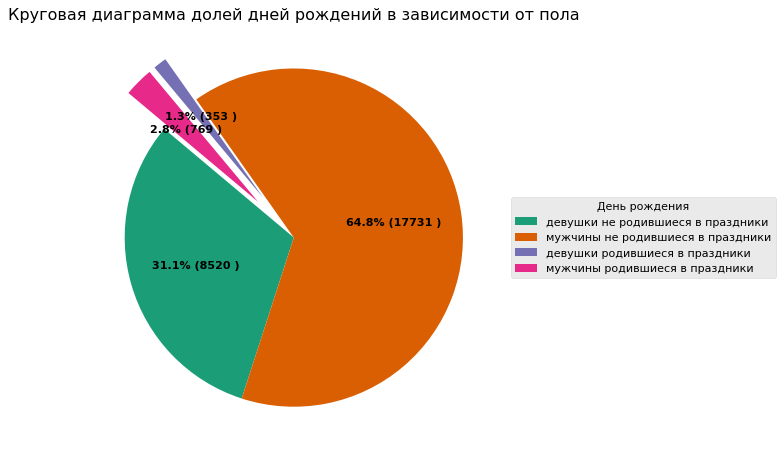

In [41]:
df_raw = df.groupby(['holiday','sex'])['id'].count().reset_index(name='counts')
# df_raw
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df_raw['counts']
categories = ['девушки не родившиеся в праздники', 
                'мужчины не родившиеся в праздники',
                'девушки родившиеся в праздники',
                'мужчины родившиеся в праздники']
explode = [0,0,0.3,0.3]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="black"), 
                                  colors=plt.cm.Dark2.colors,
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="День рождения", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Круговая диаграмма долей дней рождений в зависимости от пола")
plt.show()

__ОТВЕТ: К сожалению, мужчины склонны рождаться в праздничные дни больше чем девушки. Но стоит заметить что в нашей выборке разное количество мужчин и женщин, так что нельзя однозначно сказать__

__Проверьте гипотезу, которая гласит что большинство подписчиков паблика - подростки__

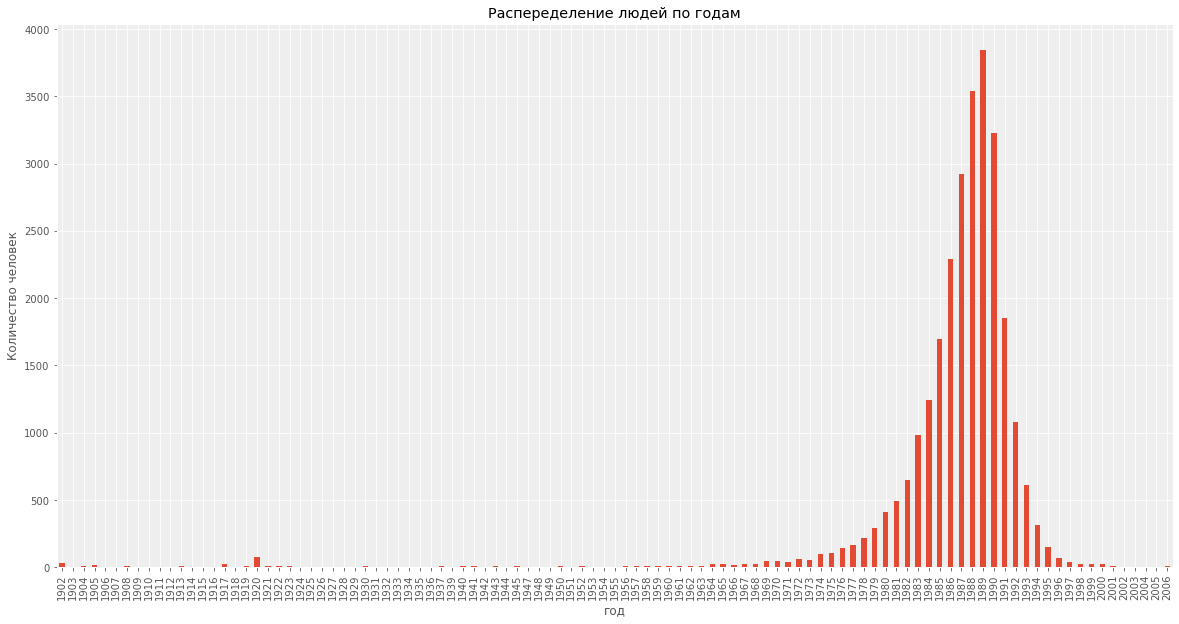

In [14]:
plt.figure(figsize=(20, 10))
ax = (df["bdate"].groupby(df["bdate"].dt.year).count()).plot(kind="bar")
ax.set_facecolor('#eeeeee')
ax.set_xlabel("год")
ax.set_ylabel("Количество человек")
ax.set_title('Распеределение людей по годам')
plt.show()

__ОТВЕТ: По графику видно, что большинство подписчиков это люди 1980-1994 годов рождения__

__Посмотрите как распределены количество подписчиков в зависимости от пола и политических предпочениий.__

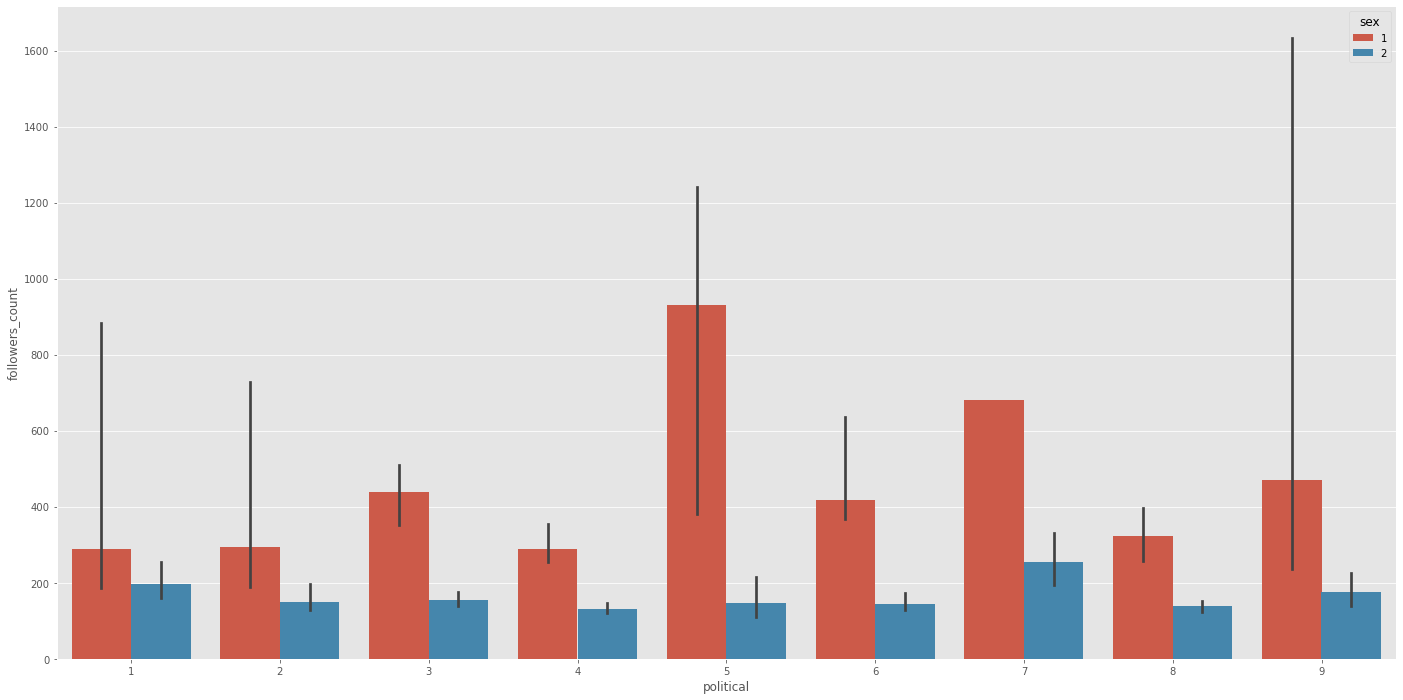

In [62]:
df_trend = df.drop(df[df["political"] == 0].index)
df_trend.groupby(["political","sex"], as_index = False)['followers_count'].sum()

plt.subplots(figsize=(24, 12))
ax = sns.barplot(x='political', y='followers_count',hue = 'sex', data=df_trend, estimator = np.median)

__political (integer) — политические предпочтения. Значения:__
* 1 — коммунистические;
* 2 — социалистические;
* 3 — умеренные;
* 4 — либеральные;
* 5 — консервативные;
* 6 — монархические;
* 7 — ультраконсервативные;
* 8 — индифферентные;
* 9 — либертарианские.

__ОТВЕТ: На диаграмме видно, что девушки с консервативными взглядами имеют большее количество подписчков__

__Построить боксплоты и проверить гипотезу о том что большая часть людей с негативным отношением к курению, имеют негативное отношение к алкоголю__

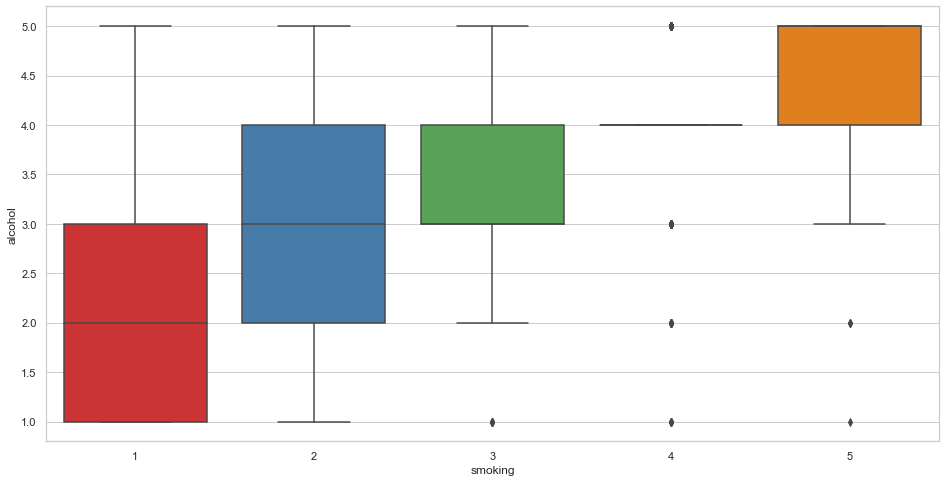

In [67]:
sns.set(style="whitegrid")
plt.subplots(figsize=(16, 8))
df_trend = df.drop(df[df["smoking"] == 0].index)
df_trend = df_trend.drop(df_trend[df_trend["alcohol"] == 0].index)
ax = sns.boxplot(x = df_trend['smoking'], y = df_trend["alcohol"], palette = "Set1")

smoking (integer) — отношение к курению. Значения:
* 1 — резко негативное;
* 2 — негативное;
* 3 — компромиссное;
* 4 — нейтральное;
* 5 — положительное.
    
alcohol (integer) — отношение к алкоголю. Значения:
* 1 — резко негативное;
* 2 — негативное;
* 3 — компромиссное;
* 4 — нейтральное;
* 5 — положительное.

__ОТВЕТ: Как мы видим из боксплотов, гипотеза верна. Те кто резко негативно относится с курению и вправду негативно или резко негативно относятся к алкоголю.__

__Проверьте гипотезу о том, что девушки чаще чем парни постят публикации__

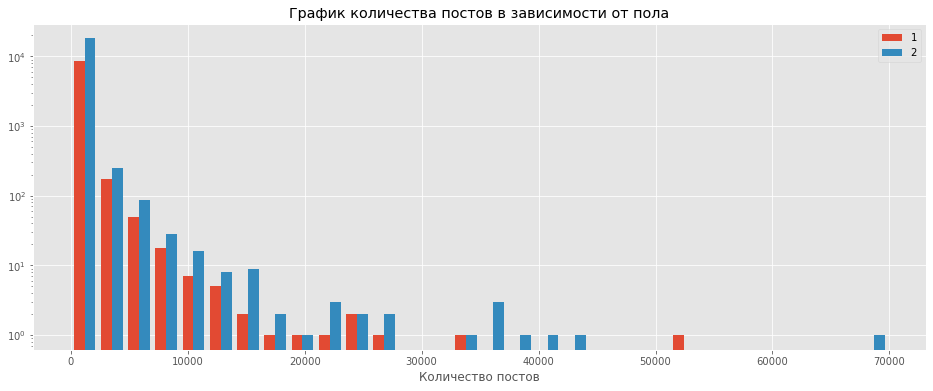

In [86]:
df_agg = df.loc[:, ['posts', 'sex']].groupby('sex')
vals = [df['posts'].values.tolist() for i, df in df_agg]
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]

plt.figure(figsize=(16,6))

ax = plt.subplot()
ax.hist(vals, 30, log=True)
ax.set_title("График количества постов в зависимости от пола")
ax.set_xlabel("Количество постов")
ax.legend({group:col for group, col in zip(np.unique(df['sex']).tolist(), colors[:len(vals)])})
plt.show()

__ОТВЕТ: Как показывает диаграмма, парни чаще чем девушки постят публикации на своей странице.__

__Проверьте гипотезу о том, что девушки чаще всего указывают наличие профиля инстаграма__

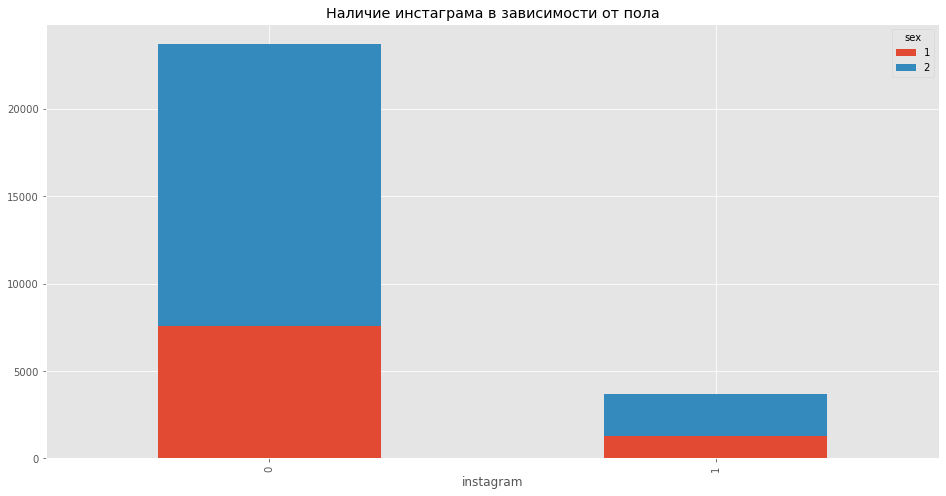

In [63]:
plt.rcParams['figure.figsize'] = (16, 8)
df.pivot_table(index='instagram', columns='sex', values='id', aggfunc='count').plot(kind="bar", stacked = True)
plt.title('Наличие инстаграма в зависимости от пола')
plt.show()

__ОТВЕТ: Гипотеза верна, как показывает диаграмма чаще всего наличие профиля инстаграма указывают девушки__

Построим корреляционную матрицу

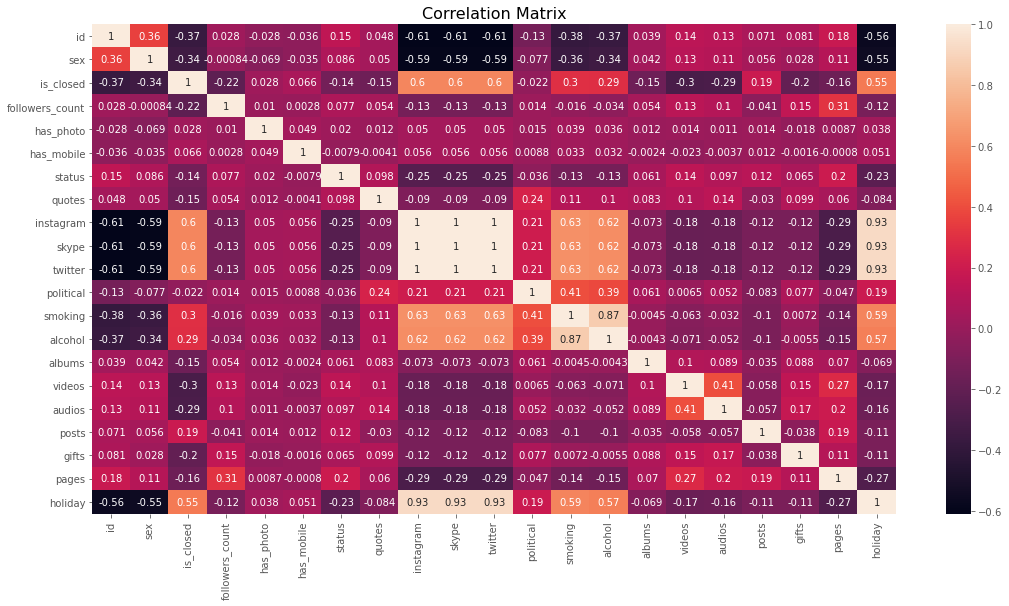

In [109]:
plt.figure(figsize=(18,9))
plt.title('Correlation Matrix', fontsize=16)
sns.heatmap(df.corr(), annot=True)
plt.show()

Сделаем из категориальных переменных количественные. Для этого применим `LabelEncoder()`

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27377 entries, 0 to 27376
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               27377 non-null  int64         
 1   first_name       27377 non-null  object        
 2   last_name        27377 non-null  object        
 3   bdate            27377 non-null  datetime64[ns]
 4   sex              27377 non-null  int64         
 5   is_closed        27377 non-null  int64         
 6   deactivated      27377 non-null  object        
 7   followers_count  27377 non-null  int64         
 8   city             27377 non-null  object        
 9   country          27377 non-null  object        
 10  has_photo        27377 non-null  int64         
 11  has_mobile       27377 non-null  int64         
 12  universities     27377 non-null  object        
 13  status           27377 non-null  int64         
 14  quotes           27377 non-null  int64

In [70]:
objects = ['universities','country','city','deactivated','last_name','first_name','bdate']
df_new = df
label_encoders = {}
for col in objects:
    label_encoders[col] = LabelEncoder()
    df_new[col] = label_encoders[col].fit_transform(df_new[col])

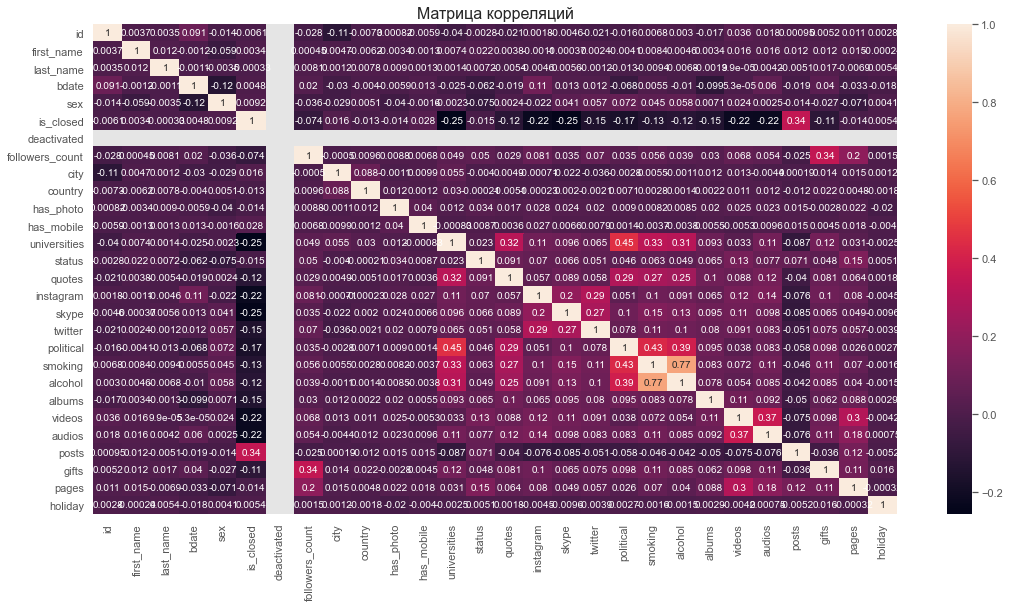

In [73]:
plt.figure(figsize=(18,9))
plt.title('Матрица корреляций', fontsize=16)
sns.heatmap(df_new.corr(), annot=True)
plt.show()

Видим, что корреляции исчезли

In [91]:
y = df_new['sex']
y = y.replace({1:0, 2:1})
df_new = df_new.drop('sex',axis = 1)

In [74]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.3, random_state = 11)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {"n_estimators":[100, 128, 256],
             "max_depth":np.arange(1, 9, 2), 
              "min_samples_leaf":[1, 3, 9, 27], 
              "min_samples_split":[3, 9, 27, 81]} #  логарифмическая шкала
gs = GridSearchCV(RandomForestRegressor(random_state = 11, 
                                        warm_start = True), 
                  param_grid, 
                  make_scorer(r2_score),
                  n_jobs = -1,
                  verbose=3)

gs.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 52.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 75.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=11,
                                             verbose=0, warm_start=True),
             iid='deprecated', n_jo

In [92]:
gs.best_params_

{'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'n_estimators': 100}

In [93]:
RF_hp = RandomForestRegressor(n_estimators = 100,
                              min_samples_leaf = 3,
                              max_depth = 7,
                              min_samples_split = 9,
                              random_state = 11
)
RF_hp.fit(X_train,y_train)
RF_hp.score(X_train,y_train)

0.3224361486918341

Результат не самый впечатляющий, но что же поделать. 